
## EDA of Bike details


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [84]:
df = pd.read_csv('BIKE DETAILS.csv')
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [85]:
# 1. What is the range of selling prices in the dataset

price_range = df['selling_price'].agg(['min', 'max'])
print("Selling Price Range:", price_range)


Selling Price Range: min      5000
max    760000
Name: selling_price, dtype: int64


In [86]:
# 2. What is the median selling price for bikes in the dataset

median_price = df['selling_price'].median()
print("Median Selling Price:", median_price)


Median Selling Price: 45000.0


In [87]:
# 3. What is the most common seller type

most_common_seller = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller)


Most Common Seller Type: Individual


In [88]:
# 4. How many bikes have driven more than 50,000 kilometers

high_km_bikes = df[df['km_driven'] > 50000].shape[0]
print("Bikes with more than 50,000 KM driven:", high_km_bikes)


Bikes with more than 50,000 KM driven: 170


In [89]:
# 5. What is the average km_driven value for each ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average KM Driven per Ownership Type:")
print(avg_km_by_owner)

Average KM Driven per Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [90]:
# 6. What proportion of bikes are from the year 2015 or older

old_bikes_proportion = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print("Proportion of Bikes from 2015 or Older:", old_bikes_proportion)

Proportion of Bikes from 2015 or Older: 0.5664467483506126


In [91]:
# 7. What is the trend of missing values across the dataset

missing_values = df.isnull().sum()
print("Missing Values Trend:")
print(missing_values)

Missing Values Trend:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [92]:
# 8. What is the highest ex_showroom_price recorded, and for which bike

highest_ex_showroom = df.loc[df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
print("Highest Ex-Showroom Price and Bike Name:")
print(highest_ex_showroom)

Highest Ex-Showroom Price and Bike Name:
name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [93]:
#9. What is the total number of bikes listed by each seller type

seller_counts = df['seller_type'].value_counts()
print("Total Number of Bikes Listed by Seller Type:")
print(seller_counts)

Total Number of Bikes Listed by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


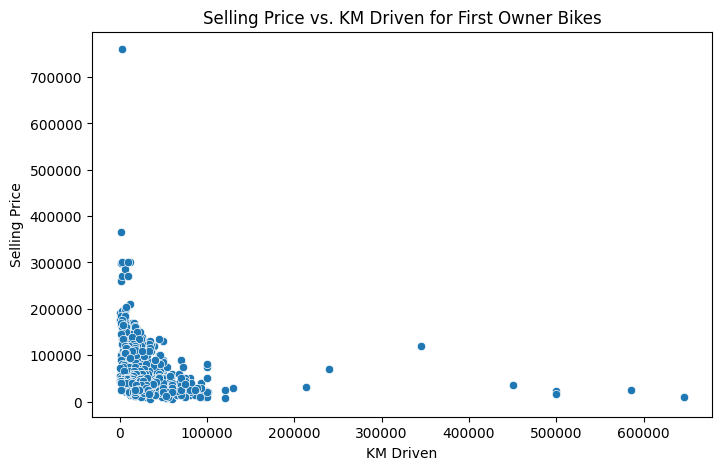

In [94]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes

plt.figure(figsize=(8,5))
sns.scatterplot(x=df[df['owner'] == '1st owner']['km_driven'], 
                y=df[df['owner'] == '1st owner']['selling_price'])
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. KM Driven for First Owner Bikes')
plt.show()

In [95]:
# 11. Identify and remove outliers in the km_driven column using the IQR method

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]

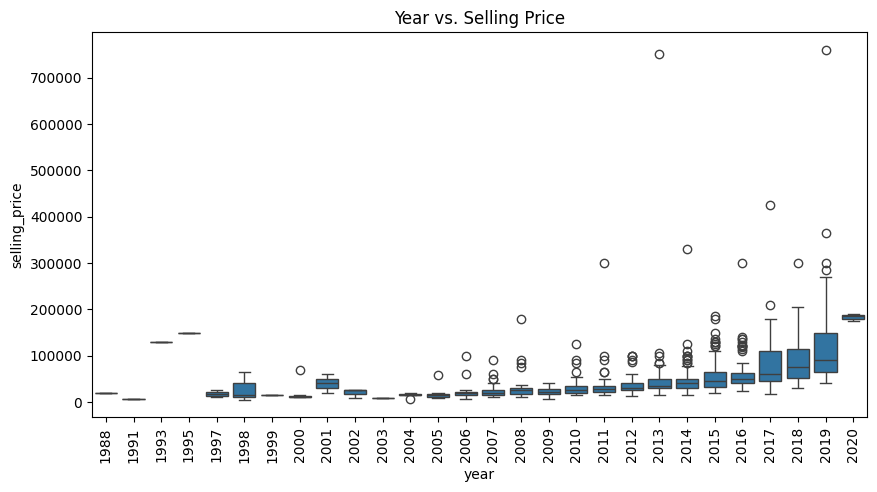

In [96]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.figure(figsize=(10,5))
sns.boxplot(x=df['year'], y=df['selling_price'])
plt.xticks(rotation=90)
plt.title('Year vs. Selling Price')
plt.show()

In [97]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

current_year = 2025
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average Depreciation in Selling Price Based on Age:")
print(avg_depreciation)

Average Depreciation in Selling Price Based on Age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [98]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year

df['price_above_avg'] = df['selling_price'] > df.groupby('year')['selling_price'].transform('mean')
high_price_bikes = df[df['price_above_avg']][['name', 'year', 'selling_price']]
print("Bikes Priced Above Average for Their Manufacturing Year:")
print(high_price_bikes)


Bikes Priced Above Average for Their Manufacturing Year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


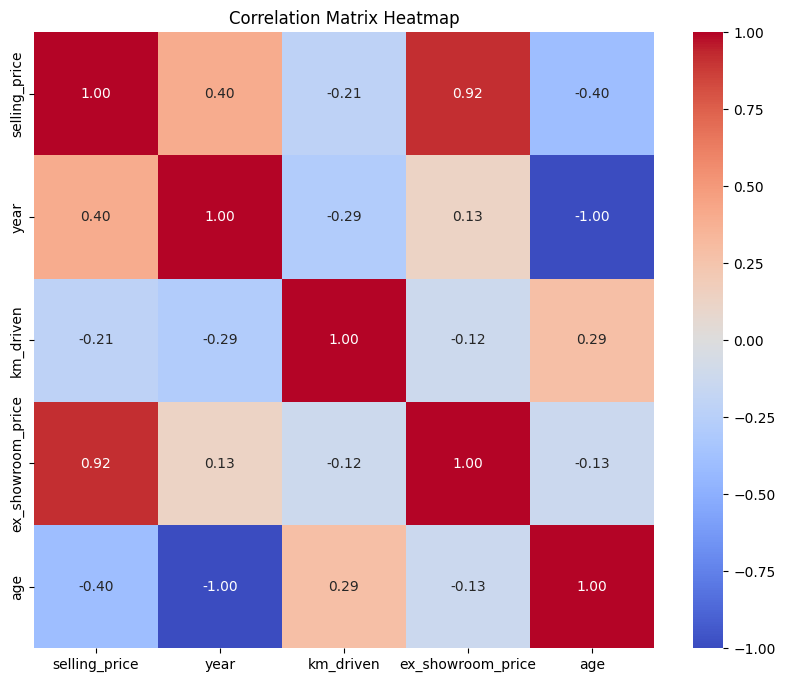

In [99]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')

numeric_cols = df.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## EDA OF CAR SALES

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Load Dataset
df = pd.read_csv("Car Sale.csv")

In [102]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [103]:
df['Date'] = pd.to_datetime(df['Date'])


In [104]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean()
print("Average Selling Price per Dealer:\n", dealer_avg_price)


Average Selling Price per Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.

In [105]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
brand_price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Highest Price Variation by Brand:\n", brand_price_variation)



Highest Price Variation by Brand:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


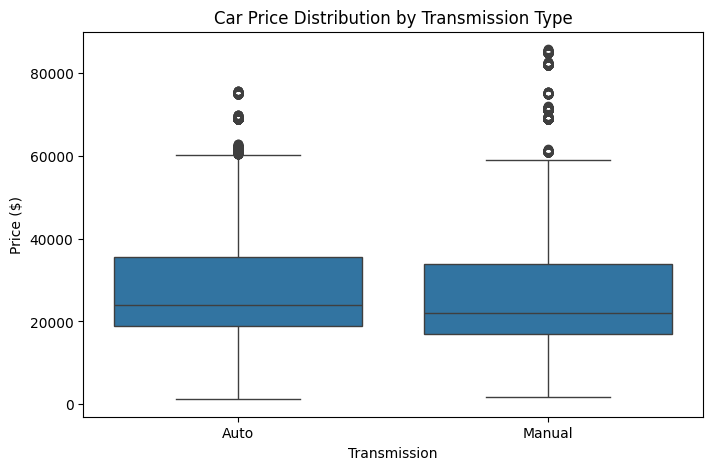

In [106]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Transmission'], y=df['Price ($)'])
plt.title("Car Price Distribution by Transmission Type")
plt.show()


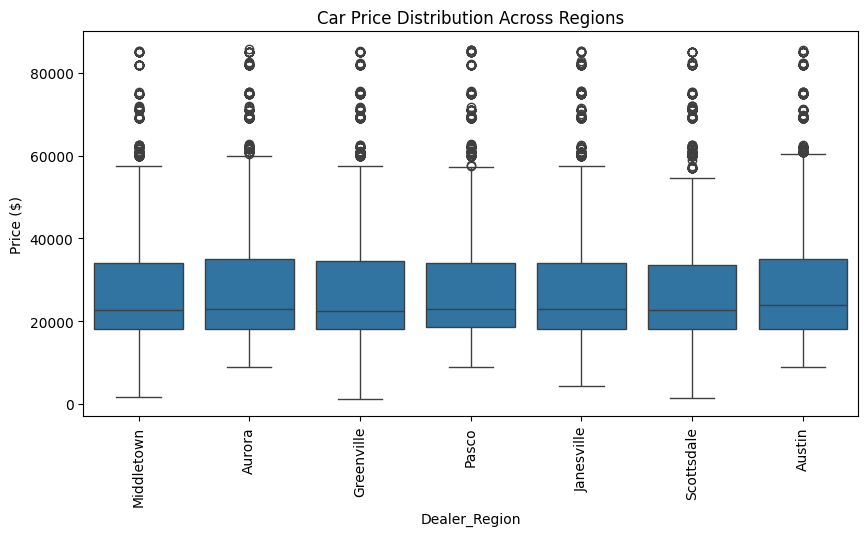

In [107]:
# 4.  What is the distribution of car prices across different regions
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Dealer_Region'], y=df['Price ($)'])
plt.xticks(rotation=90)
plt.title("Car Price Distribution Across Regions")
plt.show()


In [108]:
# 5. What is the distribution of cars based on body styles

body_style_distribution = df['Body Style'].value_counts()
print("Distribution of Cars Based on Body Style:\n", body_style_distribution)



Distribution of Cars Based on Body Style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [109]:
# 6. How does the average selling price of cars vary by customer gender and annual income
gender_income_price = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print("Average Selling Price by Customer Gender & Annual Income:\n", gender_income_price)

Average Selling Price by Customer Gender & Annual Income:
 Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


In [110]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

region_price_distribution = df.groupby('Dealer_Region')['Price ($)'].describe()
cars_sold_by_region = df['Dealer_Region'].value_counts()
print("Car Prices by Region:\n", region_price_distribution)
print("Cars Sold by Region:\n", cars_sold_by_region)



Car Prices by Region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  856

In [111]:
# 8. How does the average car price differ between cars with different engine sizes
engine_avg_price = df.groupby('Engine')['Price ($)'].mean()
print("Average Car Price by Engine Type:\n", engine_avg_price)


Average Car Price by Engine Type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [112]:
# 9.  How do car prices vary based on the customer’s annual income bracket
income_price_distribution = df.groupby('Annual Income')['Price ($)'].mean()
print("Car Prices by Annual Income Bracket:\n", income_price_distribution)


Car Prices by Annual Income Bracket:
 Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


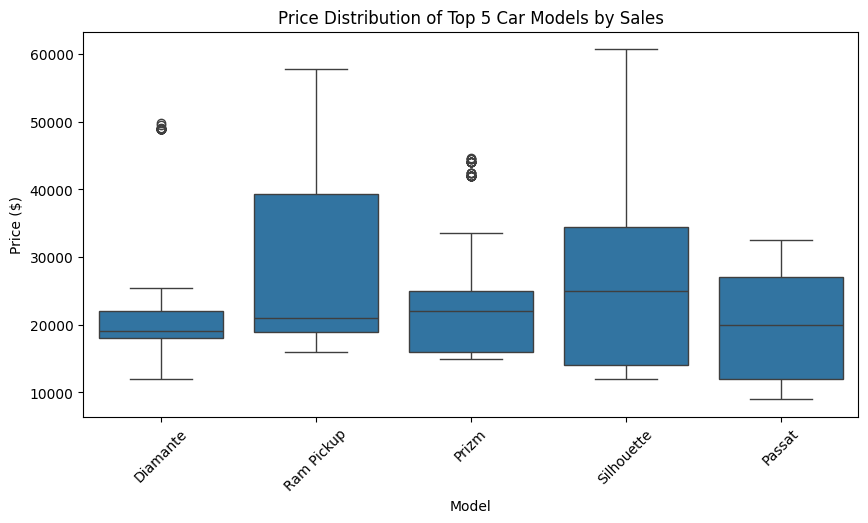

In [113]:
# 10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df['Model'].value_counts().head(5).index
plt.figure(figsize=(10,5))
sns.boxplot(x=df[df['Model'].isin(top_models)]['Model'], y=df['Price ($)'])
plt.title("Price Distribution of Top 5 Car Models by Sales")
plt.xticks(rotation=45)
plt.show()



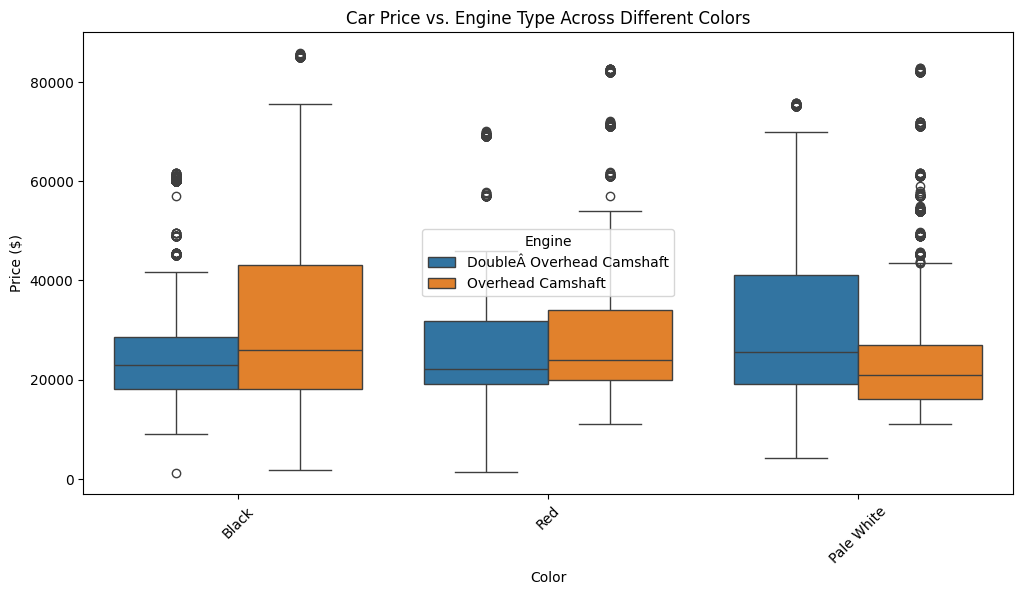

In [114]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Color'], y=df['Price ($)'], hue=df['Engine'])
plt.xticks(rotation=45)
plt.title("Car Price vs. Engine Type Across Different Colors")
plt.show()



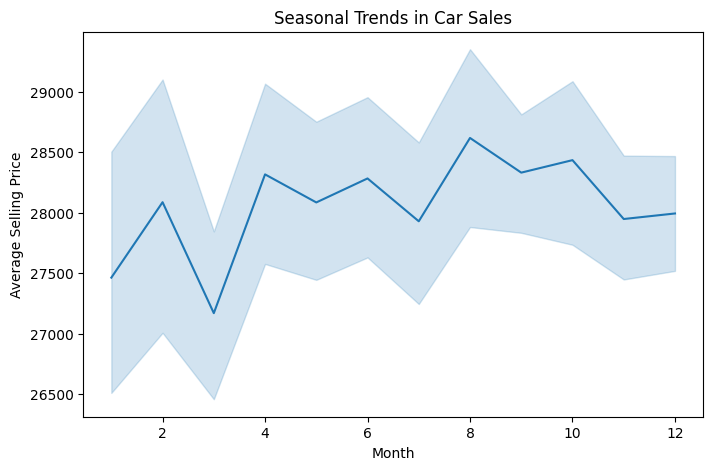

In [115]:
# 12. Is there any seasonal trend in car sales based on the date of sale

df['sale_month'] = df['Date'].dt.month
plt.figure(figsize=(8,5))
sns.lineplot(x=df['sale_month'], y=df['Price ($)'])
plt.title("Seasonal Trends in Car Sales")
plt.xlabel("Month")
plt.ylabel("Average Selling Price")
plt.show()



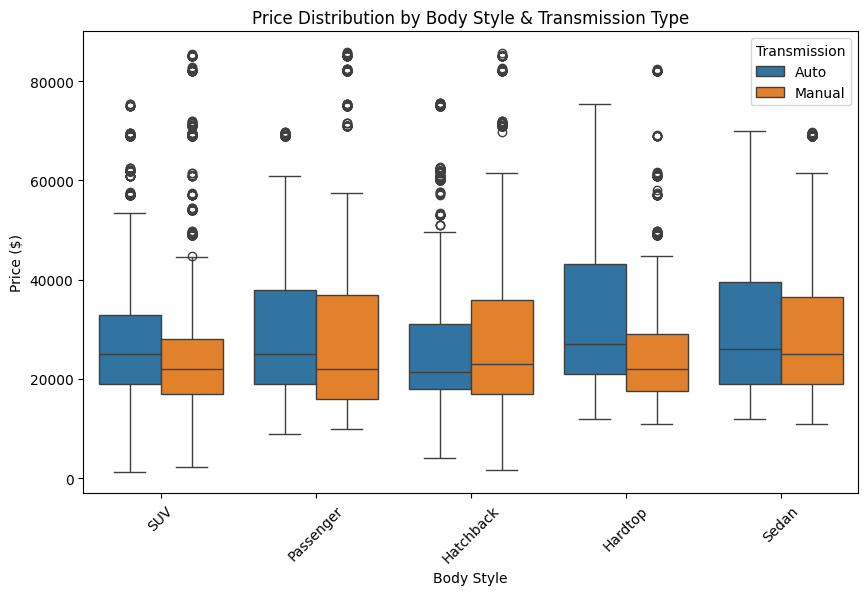

In [116]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Body Style'], y=df['Price ($)'], hue=df['Transmission'])
plt.xticks(rotation=45)
plt.title("Price Distribution by Body Style & Transmission Type")
plt.show()


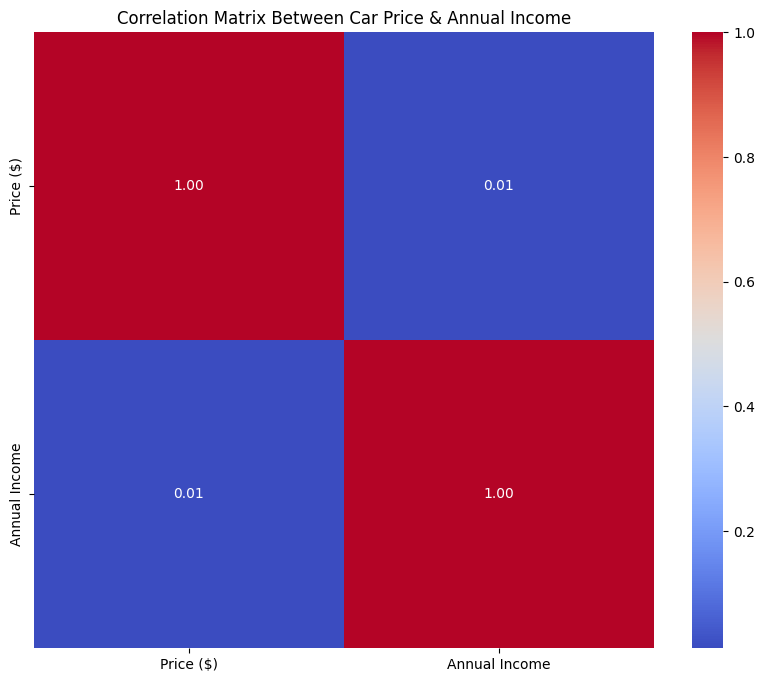

In [117]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
df_numeric = df[['Price ($)', 'Annual Income']].dropna()
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Car Price & Annual Income")
plt.show()



In [118]:

# 15. How does the average car price vary across different car models and engine types?
model_engine_avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print("Average Car Price Across Models & Engine Types:\n", model_engine_avg_price)


Average Car Price Across Models & Engine Types:
 Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


EDA of amazon sales

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [120]:
# Load Dataset
df = pd.read_csv("amazon.csv")

In [121]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [122]:
columns_to_convert = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

for col in columns_to_convert:
    df[col] = pd.to_numeric(
        df[col].astype(str)
            .str.replace("₹", "", regex=False)
            .str.replace("%", "", regex=False)
            .str.replace(",", "", regex=False)
            .str.replace("|", "", regex=False),
        errors='coerce'
    )


In [123]:
# 1. What is the average rating for each product categoryk

category_avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Average Rating for Each Product Category:\n", category_avg_rating)


Average Rating for Each Product Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Ac

In [124]:
# 2. What are the top rating_count products by categoryk
top_products_by_category = df.groupby('category')['rating_count'].max().sort_values(ascending=False)
print("Top Rating Count Products by Category:\n", top_products_by_category)


Top Rating Count Products by Category:
 category
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables               426973.0
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                 363713.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones         313836.0
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers    270563.0
Computers&Accessories|ExternalDevices&DataStorage|PenDrives                  253105.0
                                                                               ...   
Computers&Accessories|Components|InternalHardDrives                             362.0
Computers&Accessories|Laptops|TraditionalLaptops                                323.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms             305.0
Electronics|HomeAudio|Speakers|TowerSpeakers                                    282.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                    224.0
Name:

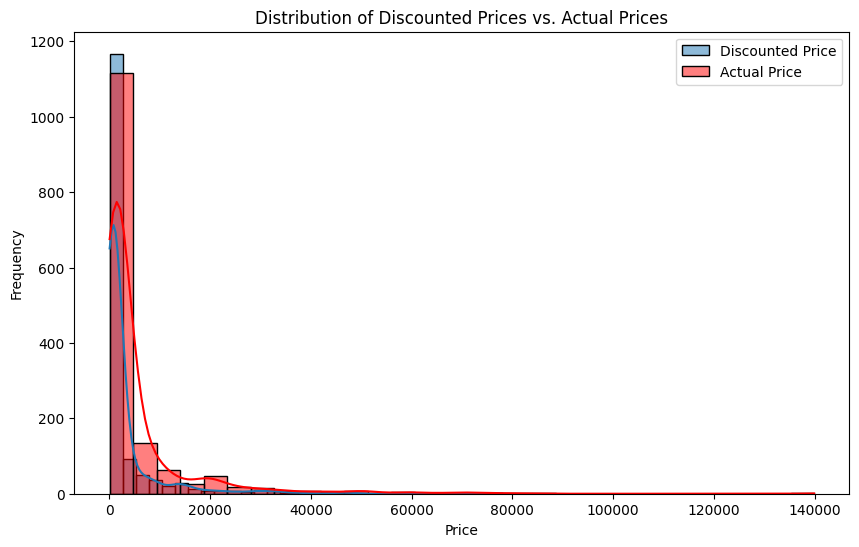

In [125]:
# 3. What is the distribution of discounted prices vs. actual pricesk

plt.figure(figsize=(10,6))
sns.histplot(df['discounted_price'], bins=30, kde=True, label='Discounted Price')
sns.histplot(df['actual_price'], bins=30, kde=True, label='Actual Price', color='red')
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [126]:
# 4. How does the average discount percentage vary across categoriesk
category_avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("Average Discount Percentage Across Categories:\n", category_avg_discount)



Average Discount Percentage Across Categories:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper         

In [127]:
# 5. What are the most popular product namesk
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print("Most Popular Product Names:\n", popular_products)


Most Popular Product Names:
 product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)           

In [128]:
# 6. What are the most popular product keywordsk
from collections import Counter

keywords = " ".join(df['product_name']).split()
keyword_counts = Counter(keywords)
popular_keywords = keyword_counts.most_common(10)
print("Most Popular Product Keywords:\n", popular_keywords)


Most Popular Product Keywords:
 [('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208)]


In [129]:
# 7. What are the most popular product reviewsk
popular_reviews = df.groupby('review_title')['rating_count'].sum().sort_values(ascending=False).head(10)
print("Most Popular Product Reviews:\n", popular_reviews)


Most Popular Product Reviews:
 review_title
It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase                                                                                                                                    1707891.0
Best phone for below normal use,Good mobile for minimal usage , but technically highly worth,For simple use,Ok,Good quality product,Good unit,Good,Best Budget mobile                                                                                                                      1255336.0
Best value for money,HEAD PHONE POUCH NOT RECEIVED,Overall good in this pricerange,It's not working in my Phone properly Plz help me in exchange or return, I ll be thankful to you,Worth the money 🤑,Best,Nice sound,Wonderful product                                                    1091137.0
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fi

In [130]:
# 8. What is the correlation between discounted_price and ratingk
correlation = df[['discounted_price', 'rating']].corr()
print("Correlation Between Discounted Price and Rating:\n", correlation)


Correlation Between Discounted Price and Rating:
                   discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [131]:
# 9. What are the Top 5 categories based on the highest ratingsk
top_categories = category_avg_rating.head(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_categories)


Top 5 Categories Based on Highest Ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [140]:
df.shape

(1465, 16)

In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis

# Potential areas for improvement or optimization:
# - Increase the average rating in categories with lower ratings.
# - Improve sentiment scores for products with high ratings but negative reviews.
# - Address common complaints identified in negative reviews.
# - Enhance product descriptions to better align with customer expectations.
# - Normalize review data for more accurate analysis.

## EDA OF Spotify


In [148]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings 
warnings.filterwarnings("ignore")


In [149]:
df = pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [150]:
df.shape

(440, 5)

In [151]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [153]:
# 1. Read the dataframe, check for missing values, and handle them if present. Also, check for duplicate rows and remove them.

df.dropna(inplace=True)  # Remove null values
df.drop_duplicates(inplace=True)  # Remove duplicate rows
print("After Cleanup - Shape:", df.shape)


After Cleanup - Shape: (413, 5)


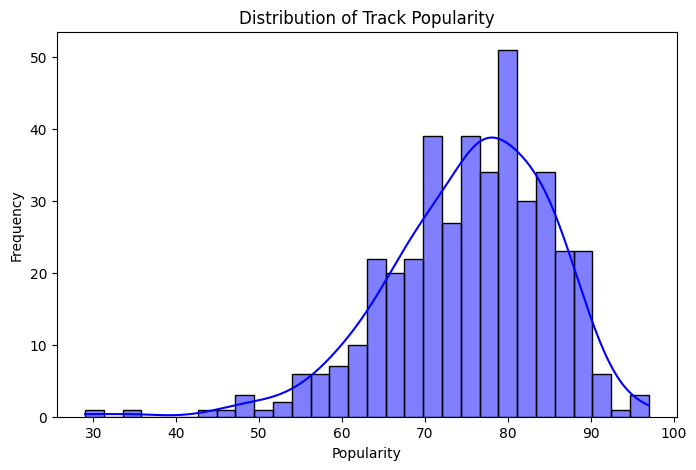

In [155]:
# 2. What is the distribution of popularity among tracks in the dataset? Visualize this using a histogram.

plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


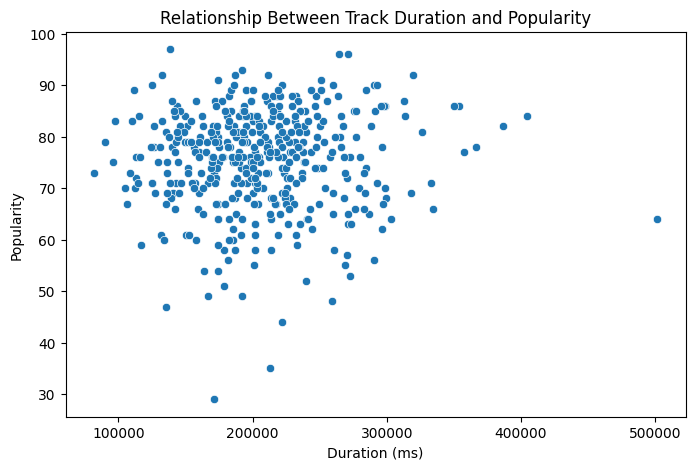

In [156]:
# 3. Is there any relationship between popularity and track duration? Explore this using a scatter plot.

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'])
plt.title("Relationship Between Track Duration and Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


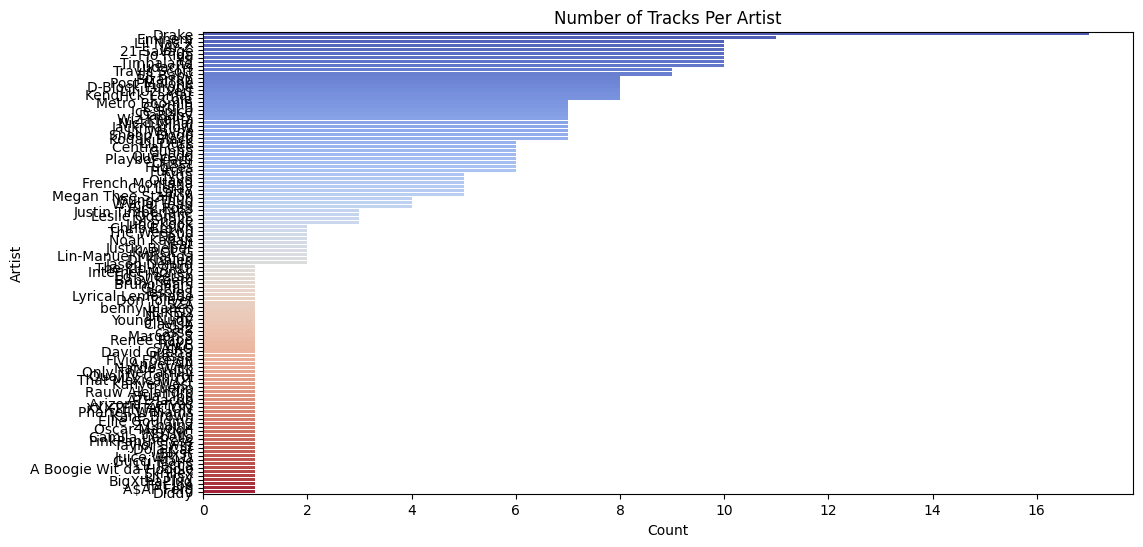

In [157]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

plt.figure(figsize=(12,6))
sns.countplot(y=df['Artist'], order=df['Artist'].value_counts().index, palette="coolwarm")
plt.title("Number of Tracks Per Artist")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()



In [158]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular)


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [159]:
# 6. Among the top 5 most popular artists, which one has the highest average popularity? Calculate and display the average popularity for each artist
top_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print("Top 5 Most Popular Artists by Average Popularity:\n", top_artists)


Top 5 Most Popular Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [160]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_5_artists = top_artists.index.tolist()
most_popular_tracks = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Track Name'].first()
print("Most Popular Tracks by Top 5 Artists:\n", most_popular_tracks)


Most Popular Tracks by Top 5 Artists:
 Artist
David Guetta              Baby Don't Hurt Me
Travis Scott          MELTDOWN (feat. Drake)
Trueno          Mamichula - con Nicki Nicole
cassö                                  Prada
¥$                                  CARNIVAL
Name: Track Name, dtype: object


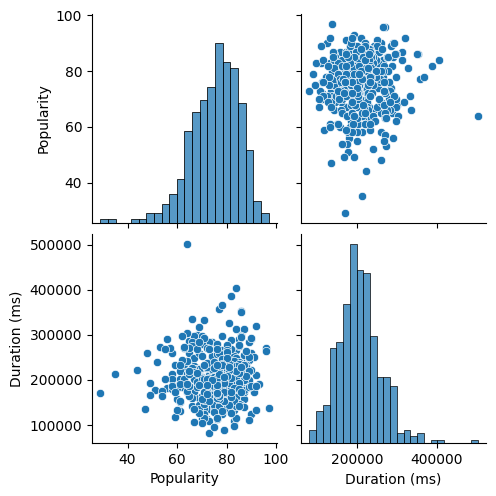

In [161]:
# 8. Visualize relationships between multiple numerical variables simultaneously. Use a pair plot to examine correlations.

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


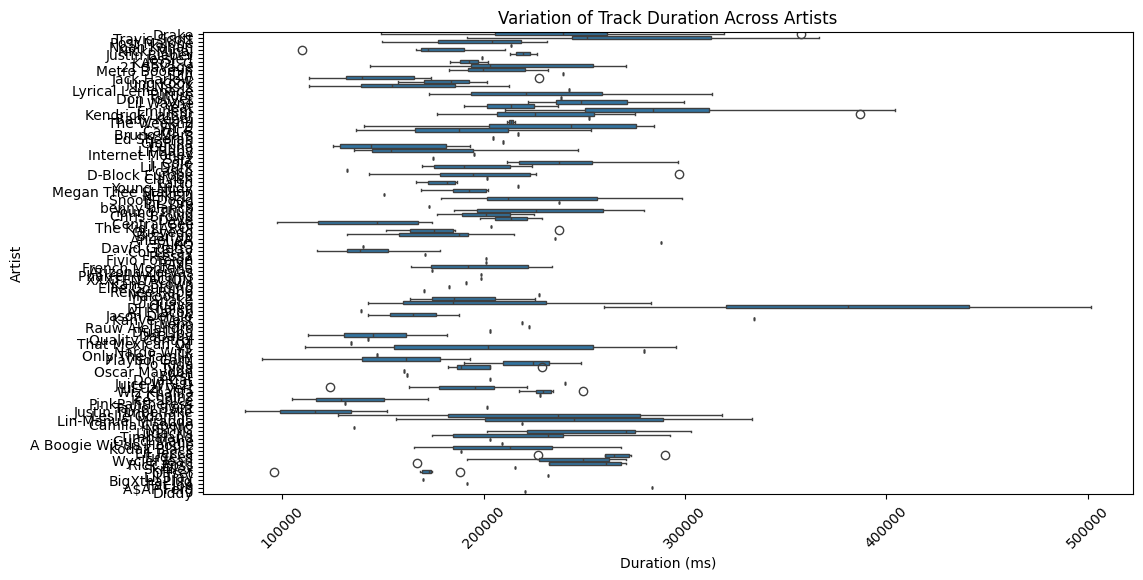

In [162]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

plt.figure(figsize=(12,6))
sns.boxplot(y=df['Artist'], x=df['Duration (ms)'])
plt.xticks(rotation=45)
plt.title("Variation of Track Duration Across Artists")
plt.show()


Text(0.5, 1.0, 'Distribution of Track Popularity Across Artists')

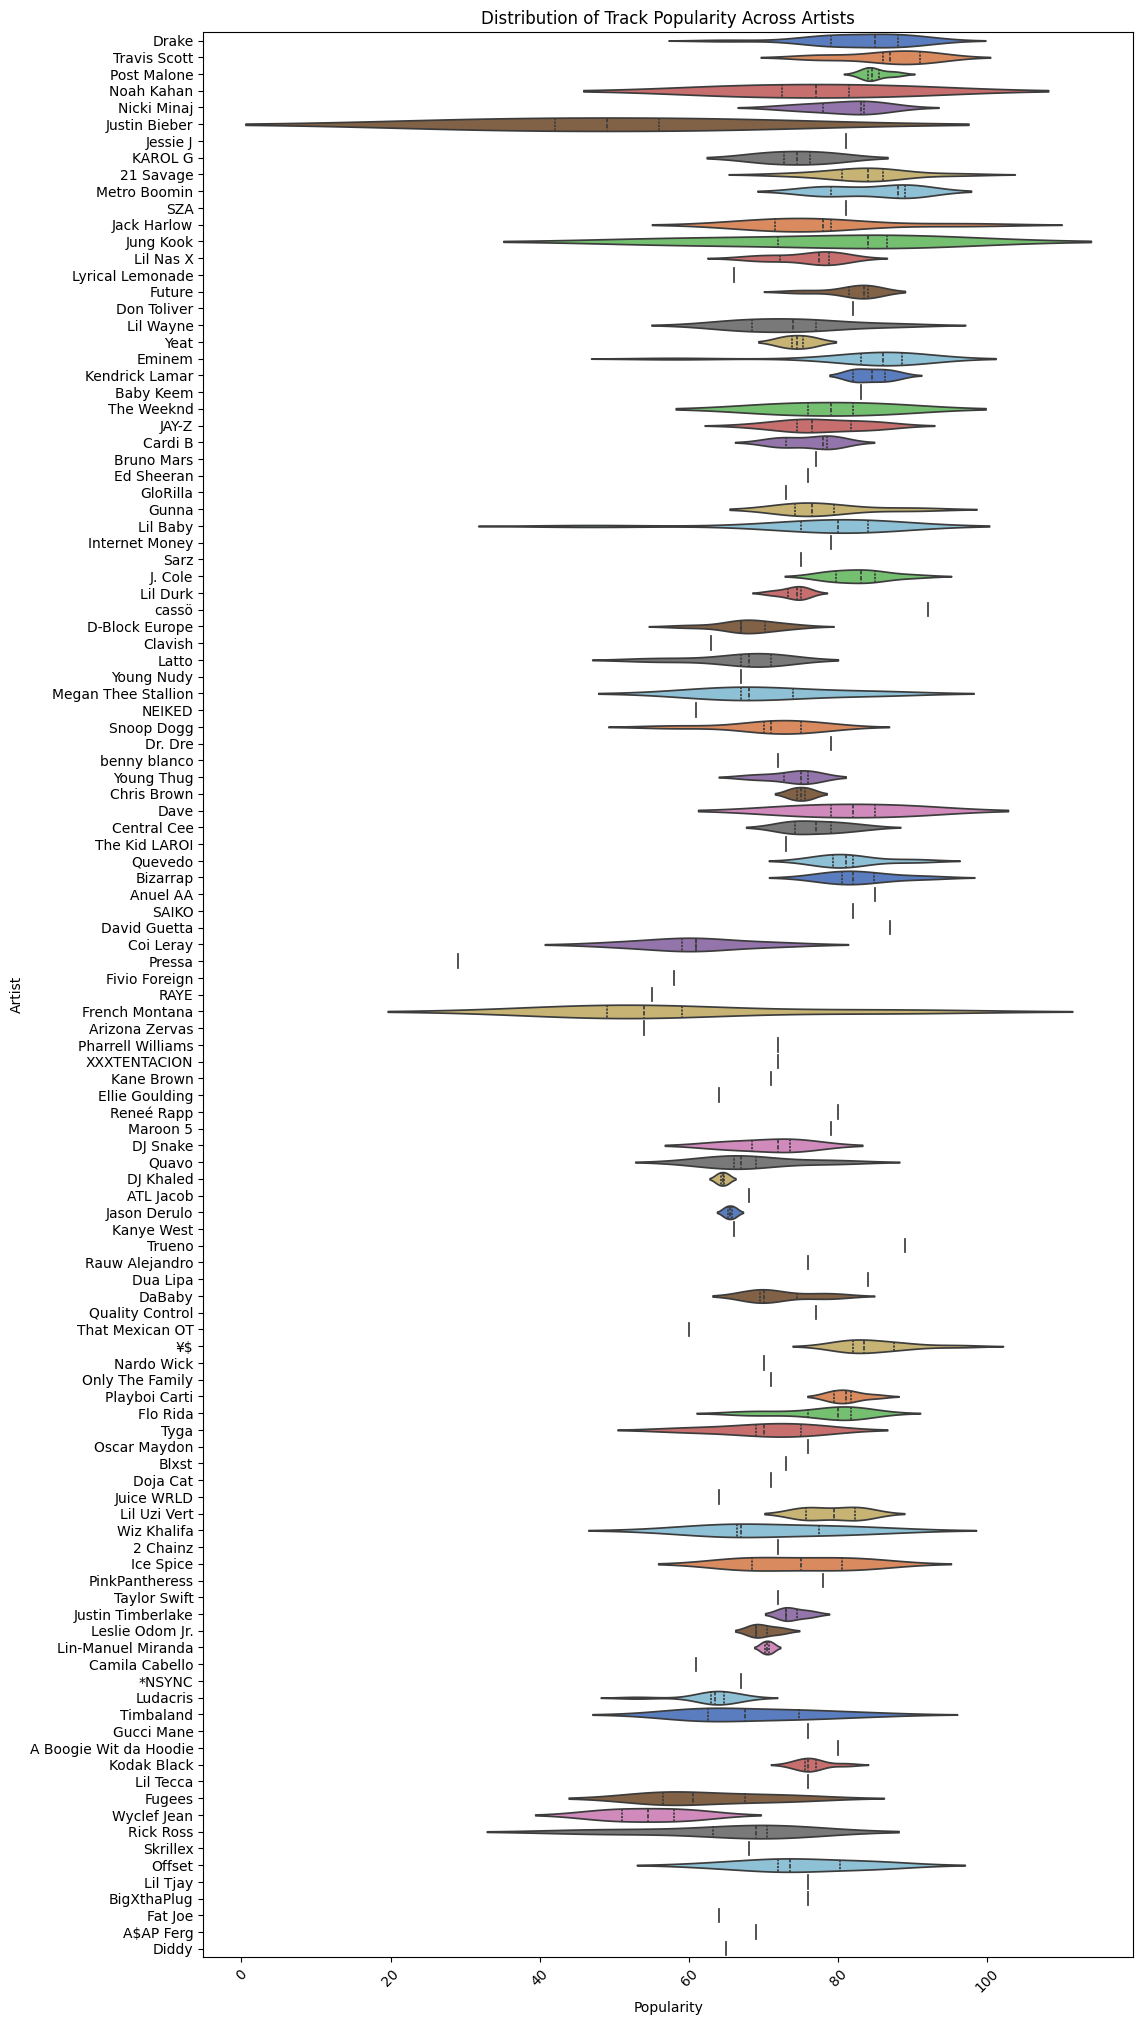

In [166]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12,25))
sns.violinplot(y=df['Artist'], x=df['Popularity'], inner='quartile', palette="muted")
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Artists")
